In [1]:
import numpy as np
import pandas as pd
import os,sys

In [2]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')
bleaching_data_path = os.path.join(path_data,'bleaching')

In [3]:
region = 'North America' # 'North America' or 'Asia'
years = np.arange(2008,2019)

In [4]:
# Load data bleaching_data_year_year_region.csv
# record describe for each year
whole_count = [] # Percent_Bleaching > 0
whole_mean = []
whole_sem = []
high_index = 10
high_count = [] # Percent_Bleaching > high_index
high_mean = []
high_sem = []
for year in years:
    bleaching_data_year_year_region_path = os.path.join(bleaching_data_path,'bleaching_data_year_'+str(year)+'_'+region+'.csv')
    bleaching_data_year_year_region = pd.read_csv(bleaching_data_year_year_region_path)
    whole_count.append(bleaching_data_year_year_region[bleaching_data_year_year_region['Percent_Bleaching'] > 0].shape[0])
    whole_mean.append(bleaching_data_year_year_region[bleaching_data_year_year_region['Percent_Bleaching'] > 0]['Percent_Bleaching'].mean())
    whole_sem.append(bleaching_data_year_year_region[bleaching_data_year_year_region['Percent_Bleaching'] > 0]['Percent_Bleaching'].sem())
    high_count.append(bleaching_data_year_year_region[bleaching_data_year_year_region['Percent_Bleaching'] > high_index].shape[0])
    high_mean.append(bleaching_data_year_year_region[bleaching_data_year_year_region['Percent_Bleaching'] > high_index]['Percent_Bleaching'].mean())
    high_sem.append(bleaching_data_year_year_region[bleaching_data_year_year_region['Percent_Bleaching'] > high_index]['Percent_Bleaching'].sem())

# make nan to 0
whole_count = np.array(whole_count)
whole_mean = np.array(whole_mean)
whole_sem = np.array(whole_sem)
high_count = np.array(high_count)
high_mean = np.array(high_mean)
high_sem = np.array(high_sem)
whole_count[np.isnan(whole_count)] = 0
whole_mean[np.isnan(whole_mean)] = 0
whole_sem[np.isnan(whole_sem)] = 0
high_count[np.isnan(high_count)] = 0
high_mean[np.isnan(high_mean)] = 0
high_sem[np.isnan(high_sem)] = 0

print('whole_count: ',whole_count)
print('whole_mean: ',whole_mean)
print('whole_sem: ',whole_sem)
print('high_count: ',high_count)
print('high_mean: ',high_mean)
print('high_sem: ',high_sem)

whole_count:  [193 259 232 237 182 105 187 238 154  25  13]
whole_mean:  [ 8.85502591 13.85088803 10.95232759 16.70248945  7.01247253  7.38847619
 39.80299465 29.55953782 12.54363636  9.8868      4.63461538]
whole_sem:  [0.69782554 0.74950382 0.74169845 0.83680556 0.5222156  0.71459526
 1.68612604 1.2778289  0.83871056 2.11793081 1.53657737]
high_count:  [ 58 148  89 154  37  26 161 196  83   8   2]
high_mean:  [18.73396552 20.09283784 20.86022472 22.81305195 17.42189189 18.04269231
 45.67857143 34.94943878 19.32939759 22.02125    15.625     ]
high_sem:  [1.65045432 1.03230412 1.34871632 0.96658865 1.47493563 1.29956485
 1.50958746 1.24799964 1.06977628 3.81606166 3.125     ]


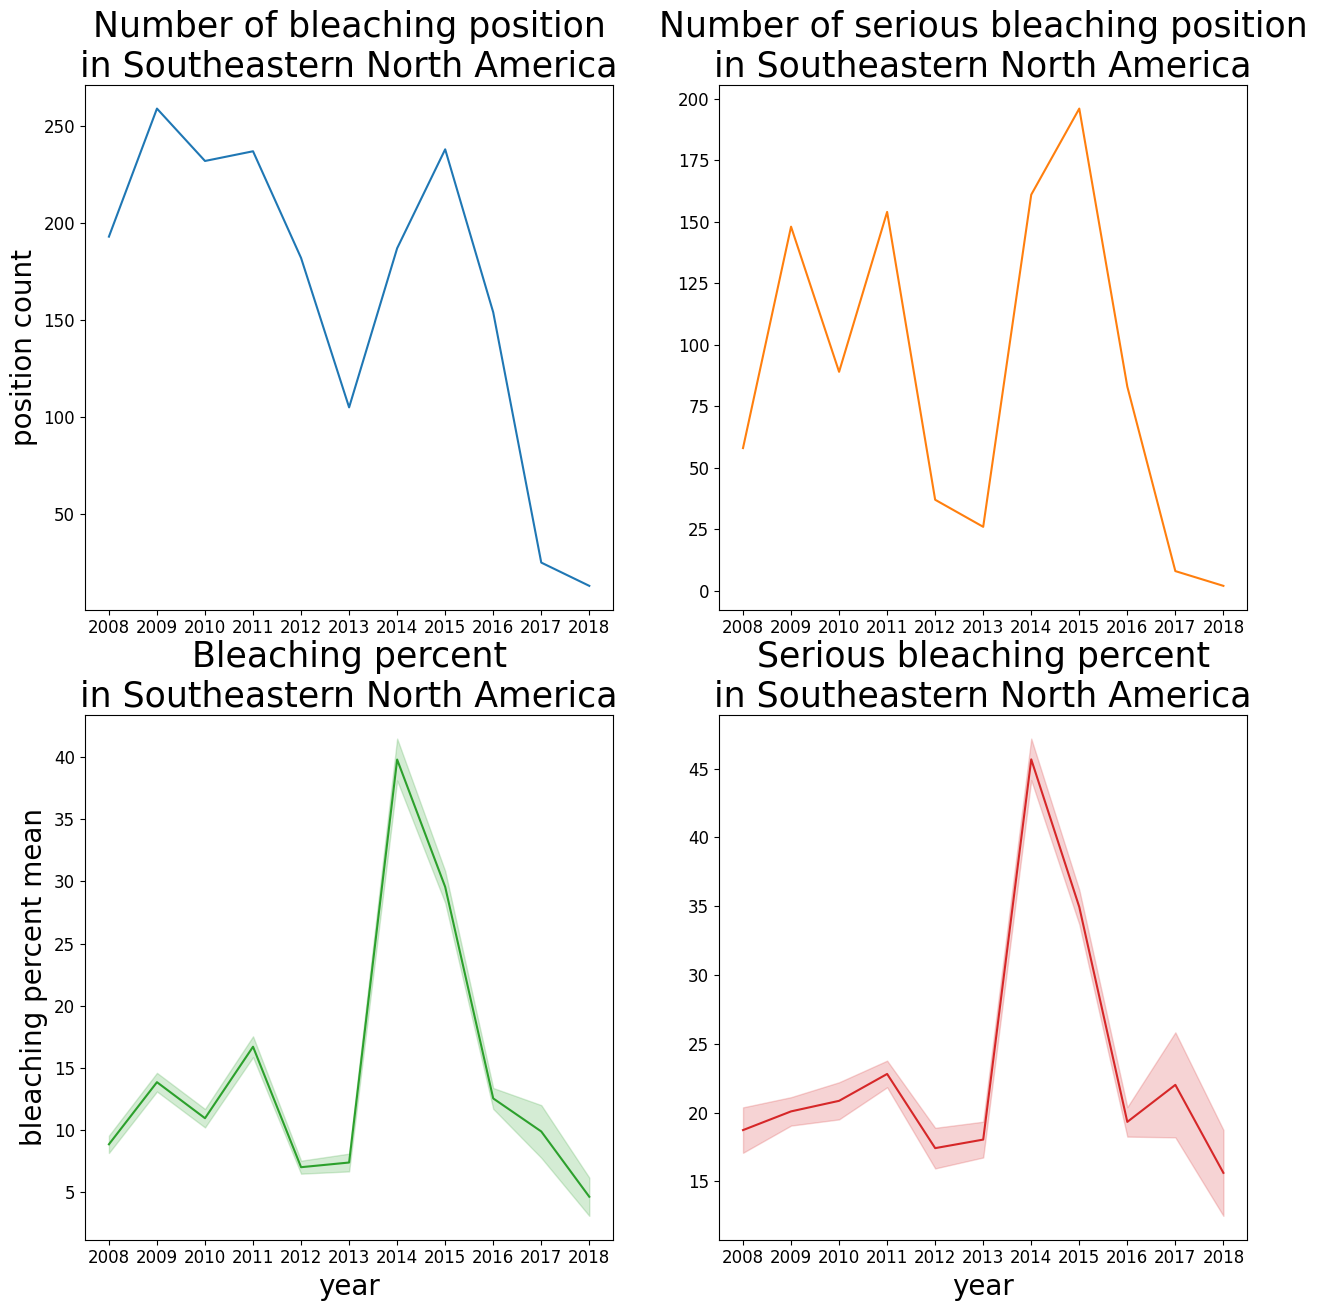

In [5]:
# (2,2) subplots
if region == 'North America':
    real_region = 'Southeastern North America'
elif region == 'Asia':
    real_region = 'Southeastern Asia'
fontsize = 20
fontsize_title = 25
fontsize_axis = 12
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].plot(years, whole_count)
axs[0, 0].set_title('Number of bleaching position' + '\n' + 'in ' + real_region,fontsize=fontsize_title)
axs[0, 1].plot(years, high_count, 'tab:orange')
axs[0, 1].set_title('Number of serious bleaching position' + '\n' + 'in ' + real_region,fontsize=fontsize_title)
axs[1, 0].plot(years, whole_mean, 'tab:green')
# plot fill_between
axs[1, 0].fill_between(years, whole_mean - whole_sem, whole_mean + whole_sem, color='tab:green', alpha=0.2)
axs[1, 0].set_title('Bleaching percent' + '\n' + 'in ' + real_region,fontsize=fontsize_title)
axs[1, 1].plot(years, high_mean, 'tab:red')
# plot fill_between
axs[1, 1].fill_between(years, high_mean - high_sem, high_mean + high_sem, color='tab:red', alpha=0.2)
axs[1, 1].set_title('Serious bleaching percent' + '\n' + 'in ' + real_region,fontsize=fontsize_title)

# first row: whole_count, high_count, ylabel is 'position count'
# second row: whole_mean, high_mean, ylabel is 'bleaching percent mean'
axs[0, 0].set_ylabel('position count', fontsize=fontsize)
# axs[0, 1].set_ylabel('position count', fontsize=fontsize)
axs[1, 0].set_ylabel('bleaching percent mean', fontsize=fontsize)
# axs[1, 1].set_ylabel('bleaching percent mean', fontsize=fontsize)

# axs[0, 0].set_xlabel('year', fontsize=fontsize)
# axs[0, 1].set_xlabel('year', fontsize=fontsize)
axs[1, 0].set_xlabel('year', fontsize=fontsize)
axs[1, 1].set_xlabel('year', fontsize=fontsize)
# xticks
for ax in axs.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(years, fontsize=fontsize_axis)
# tick_params
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=fontsize_axis)

# save figure
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)
save_fig_path = os.path.join(save_fig_folder,'bleaching_year_'+region+'.png')
plt.savefig(save_fig_path)
plt.show()